#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [36]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [37]:
x_img_train=x_img_train[:25000]
y_label_train=y_label_train[:25000]

In [38]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (25000, 32, 32, 3)  labels: (25000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [60]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [61]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [42]:
model = Sequential()

In [43]:
#卷積層1

In [44]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [45]:
model.add(Dropout(rate=0.25))

In [46]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [47]:
#卷積層2與池化層2

In [48]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [49]:
model.add(Dropout(0.25))

In [50]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [51]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [52]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [53]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [54]:
model.add(Dense(10, activation='softmax'))

In [55]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [57]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

### LOSS: binary_crossentropy

In [59]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [63]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

Train on 18750 samples, validate on 6250 samples
Epoch 1/12
18750/18750 [==============================] - 36s 2ms/step - loss: 0.3242 - accuracy: 0.9000 - val_loss: 0.3228 - val_accuracy: 0.9000
Epoch 2/12
18750/18750 [==============================] - 34s 2ms/step - loss: 0.3225 - accuracy: 0.9000 - val_loss: 0.3217 - val_accuracy: 0.9000
Epoch 3/12
18750/18750 [==============================] - 34s 2ms/step - loss: 0.3207 - accuracy: 0.9000 - val_loss: 0.3205 - val_accuracy: 0.9000
Epoch 4/12
18750/18750 [==============================] - 36s 2ms/step - loss: 0.3186 - accuracy: 0.9000 - val_loss: 0.3191 - val_accuracy: 0.9000
Epoch 5/12
18750/18750 [==============================] - 36s 2ms/step - loss: 0.3169 - accuracy: 0.9000 - val_loss: 0.3174 - val_accuracy: 0.9000
Epoch 6/12
18750/18750 [==============================] - 36s 2ms/step - loss: 0.3145 - accuracy: 0.9000 - val_loss: 0.3154 - val_accuracy: 0.9000
Epoch 7/12
18750/18750 [==============================] - 36s 2ms/ste

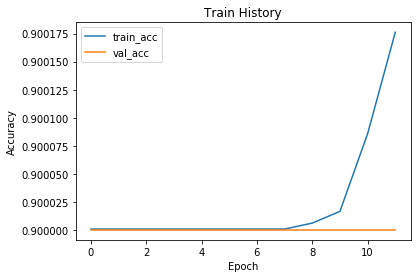

In [65]:
show_train_history('accuracy','val_accuracy')

### LOSS: MSE

In [66]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [68]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

Train on 18750 samples, validate on 6250 samples
Epoch 1/12
18750/18750 [==============================] - 37s 2ms/step - loss: 0.0845 - accuracy: 0.2456 - val_loss: 0.0851 - val_accuracy: 0.3066
Epoch 2/12
18750/18750 [==============================] - 36s 2ms/step - loss: 0.0844 - accuracy: 0.2493 - val_loss: 0.0850 - val_accuracy: 0.3066
Epoch 3/12
18750/18750 [==============================] - 37s 2ms/step - loss: 0.0842 - accuracy: 0.2520 - val_loss: 0.0849 - val_accuracy: 0.3043
Epoch 4/12
18750/18750 [==============================] - 37s 2ms/step - loss: 0.0841 - accuracy: 0.2564 - val_loss: 0.0848 - val_accuracy: 0.3069
Epoch 5/12
18750/18750 [==============================] - 38s 2ms/step - loss: 0.0842 - accuracy: 0.2551 - val_loss: 0.0847 - val_accuracy: 0.3080
Epoch 6/12
18750/18750 [==============================] - 38s 2ms/step - loss: 0.0841 - accuracy: 0.2561 - val_loss: 0.0847 - val_accuracy: 0.3083
Epoch 7/12
18750/18750 [==============================] - 41s 2ms/ste

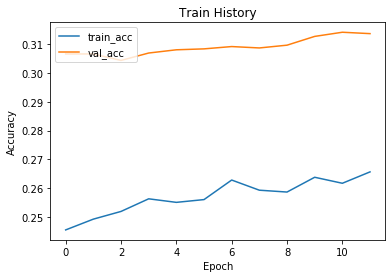

In [69]:
show_train_history('accuracy','val_accuracy')